In [ ]:
!python -m pip install --upgrade matrice

In [9]:
import matrice

print(matrice)
!pip show matrice

<module 'matrice' from 'c:\\Users\\pathi\\anaconda3\\Lib\\site-packages\\matrice\\__init__.py'>
Name: matrice
Version: 1.0.98237
Summary: SDK for connecting to matrice.ai services
Home-page: https://github.com/matrice-ai/python-sdk
Author: Matrice.ai
Author-email: dipendra@matrice.ai
License: 
Location: C:\Users\pathi\anaconda3\Lib\site-packages
Requires: matplotlib, requests, seaborn
Required-by: 


In [2]:
import yaml
import os

class Vars:
    _data = {}
    _path = None

    @classmethod
    def initialize(cls, path):
        cls._path = path
        cls._data = cls.load()

    @classmethod
    def load(cls):
        if cls._path and os.path.exists(cls._path):
            with open(cls._path, 'r') as f:
                return yaml.safe_load(f)
        return {}

    @classmethod
    def get(cls, key):
        if key not in cls._data:
            raise KeyError(f"Variable {key} not found")
        return cls._data[key]

    @classmethod
    def set(cls, key, value):
        cls._data[key] = value
        with open(cls._path, 'w') as f:
            yaml.safe_dump(cls._data, f, default_flow_style=False)


In [3]:
Vars.initialize('vars.yaml')

In [4]:
Vars.set("ENV", "dev")
Vars.set("MATRICE_ACCESS_KEY_ID", "")
Vars.set("MATRICE_SECRET_ACCESS_KEY", "")
Vars.set("MATRICE_ACCOUNT_NUMBER", "")

In [5]:
import os
os.environ['ENV'] = Vars.get('ENV')
access_key = Vars.get('MATRICE_ACCESS_KEY_ID')
secret_key = Vars.get('MATRICE_SECRET_ACCESS_KEY')
account_number = Vars.get('MATRICE_ACCOUNT_NUMBER')

In [6]:
from matrice.session import Session
from matrice.projects import Projects
from matrice.dataset import Dataset
from matrice.models import Model
from matrice.deployment import Deployment
from matrice.exported_model import ExportedModel
import sys
import os

In [10]:
session_instance = Session.create_session(account_number=account_number, access_key=access_key, secret_key=secret_key)
print("A Session has been initialized:", session_instance)

A Session has been initialized: <matrice.session.Session object at 0x000001B9C843E650>


In [11]:
projects_list, msg = session_instance.list_projects(project_type="detection")

# Check if there is a message or error
if msg:
    print(f"Message: {msg}")

# Print the projects in a formatted manner
for project_name, project_instance in projects_list.items():
    print(f"Project Name: {project_name} | Project ID: {project_instance.project_id}")

Message: Projects fetched successfully
Project Name: Parking-Space-Detection | Project ID: 6735fb6d0ebcf07b58685538
Project Name: Drone-Windmill-Maintainence | Project ID: 672251b73f122d1d31ac85df
Project Name: Tumor-Classification-Project | Project ID: 6728cfef1478c8033c877557
Project Name: Shoplifting-Retail-Detection | Project ID: 6728cc001478c8033c87753b
Project Name: Crop-Weed-Detection | Project ID: 6728bd804e370c5e10793517
Project Name: Test-Project-1 | Project ID: 67221278e444a8664263f806
Project Name: test-det | Project ID: 671f7af124f52600d8b27df2
Project Name: Drone Detection Use Case 1 | Project ID: 66c6fa777668fd51f7b98c74
Project Name: Crop Detection Use Case Final-4 | Project ID: 66c5cffd2dca8efe8f2562ec
Project Name: instance_segmentation | Project ID: 66a08a0ea6b455cdb12a5d59


In [12]:
project_name = "Gas-Flare-Detection"
for name, project_instance in projects_list.items():
    if name == project_name:
        projects_instance = Projects(session_instance, project_name=project_name)
        session_instance.update(projects_instance.project_id)
        print(f"Project '{project_name}' already exists. Initialized Projects instance.")
        project_exists = True
        break
    else:
        project_exists = False

if project_exists == False:
    print(f"Creating a new project: {project_name}")

Creating a new project: Gas-Flare-Detection


In [13]:
import pprint

name = "Gas-Flare-Detection"

# Function to create a project
def create_project():
    project_name = name
    input_type = "image"
    output_type = "detection"
    
    enabled_platforms = {
        "matrice": True,
        "android": False,
        "ios": False,
        "tpu": False,
        "intelCPU": False,
        "gcloudGPU": False
    }

    resp, error = session_instance._create_project(project_name, input_type, output_type)
    if error:
        print(f"Error: {error}")
        return None, None
    else:
        print(f"Project created with ID: {resp['_id']}")
        return resp['_id'], resp['name']

# Check if project_id and project_name exist
project_id = None
project_name = None

if not project_exists:
    project_id, project_name = create_project()
else:
    project_id = projects_instance.project_id
    project_name = projects_instance.project_name
    print(f"Project already exists with ID: {project_id} and Name: {project_name}")


print("----------------------------")
print(f"Project ID: {project_id}")
print(f"Project Name: {project_name}")
print("----------------------------")


Project created with ID: 679cdd9b82a22dbdd117e9df
----------------------------
Project ID: 679cdd9b82a22dbdd117e9df
Project Name: Gas-Flare-Detection
----------------------------


In [14]:
Vars.set("project_name",project_name)
Vars.set("project_id", project_id)

In [15]:
session_instance.update(project_id)
project_instance = Projects(session_instance, project_name=project_name)
print("A Project class has been initialized",project_instance)

A Project class has been initialized <matrice.projects.Projects object at 0x000001B9C491CFD0>


In [16]:
dataset_dir = r"C:\Users\pathi\OneDrive\Desktop\matriceai\matrice_usecases_local\datasets\Gas-Flaring-Detection-2"
output_dir = r"C:\Users\pathi\OneDrive\Desktop\matriceai\matrice_usecases_local\datasets\gas-flaring-detection-mscoco"
class_names = ['Dark-Flare', 'Dark-Smoke', 'Light-Flare', 'Light-Smoke', 'Medium-Flare', 'Medium-Smoke'] 


<Figure size 1000x1000 with 0 Axes>

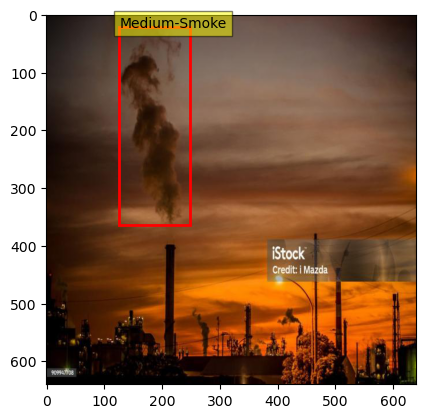

<Figure size 1000x1000 with 0 Axes>

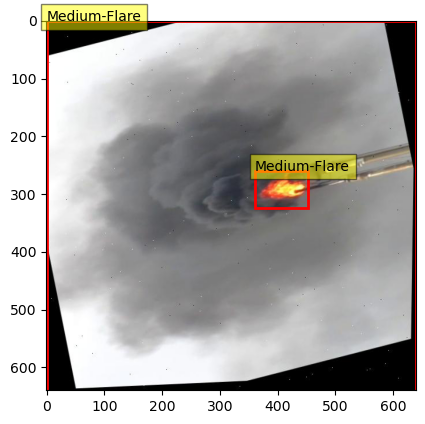

<Figure size 1000x1000 with 0 Axes>

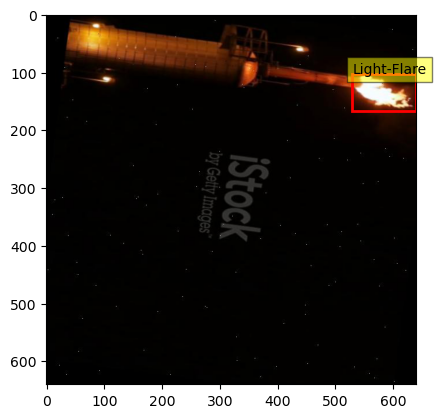

<Figure size 1000x1000 with 0 Axes>

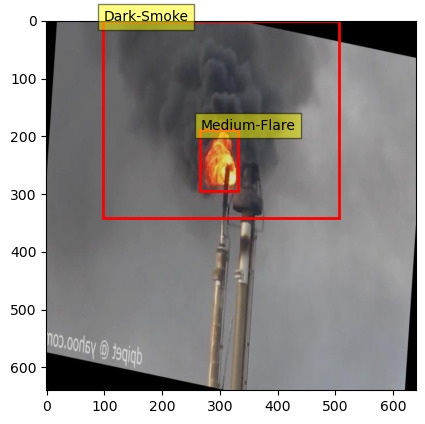

<Figure size 1000x1000 with 0 Axes>

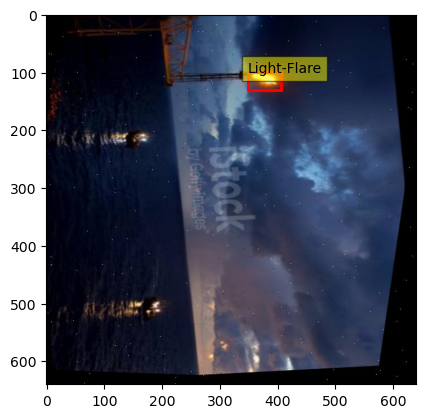

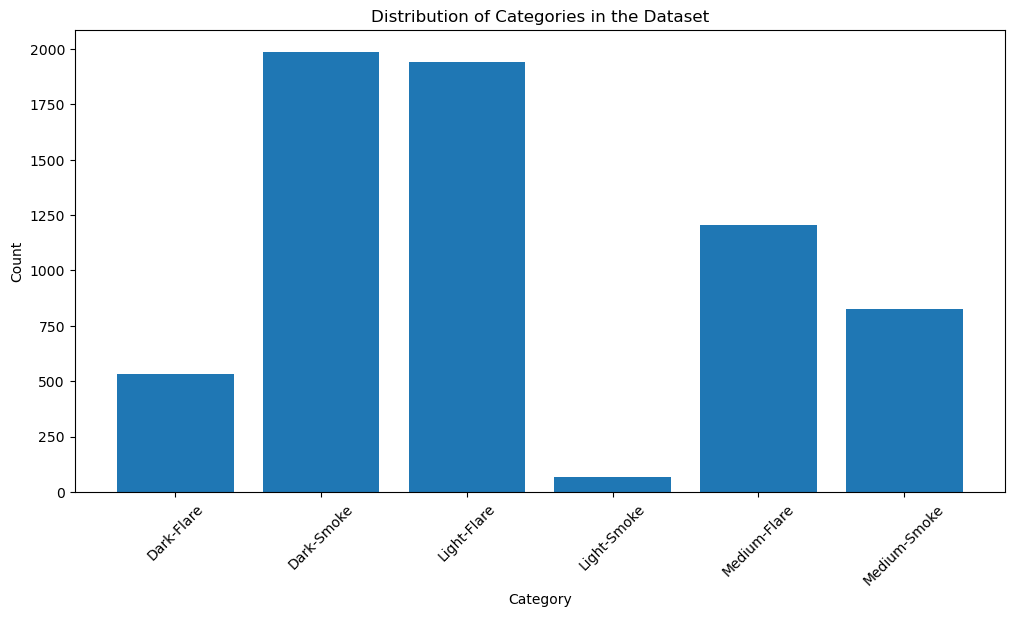

Number of images: 4689
Number of annotations: 6561
Number of categories: 6


In [17]:
import random
import json

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL

# Load the COCO annotations
with open(os.path.join(output_dir, 'annotations/train.json')) as f:
    coco_data = json.load(f)

# Create a dictionary to map image IDs to image file names
image_id_to_file = {img['id']: img['file_name'] for img in coco_data['images']}

# Create a dictionary to map category IDs to category names
category_id_to_name = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Randomly select 5 images
sample_images = random.sample(coco_data['images'], 5)

# Plot the images with bounding boxes
for img in sample_images:
    img_id = img['id']
    img_file = os.path.join(output_dir, 'images/train', img['file_name'])
    
    # Open the image
    image = PIL.Image.open(img_file)
    plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    
    # Plot the bounding boxes
    for ann in coco_data['annotations']:
        if ann['image_id'] == img_id:
            bbox = ann['bbox']
            category_id = ann['category_id']
            category_name = category_id_to_name[category_id]
            
            # Create a Rectangle patch
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(bbox[0], bbox[1], category_name, bbox=dict(facecolor='yellow', alpha=0.5))
    
    plt.show()

# Perform some EDA
# Count the number of annotations per category
category_counts = {cat['name']: 0 for cat in coco_data['categories']}
for ann in coco_data['annotations']:
    category_name = category_id_to_name[ann['category_id']]
    category_counts[category_name] += 1

# Plot the category distribution
plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in the Dataset')
plt.xticks(rotation=45)
plt.show()

# Print some basic statistics
num_images = len(coco_data['images'])
num_annotations = len(coco_data['annotations'])
num_categories = len(coco_data['categories'])

print(f"Number of images: {num_images}")
print(f"Number of annotations: {num_annotations}")
print(f"Number of categories: {num_categories}")

In [19]:
dataset, dataset_action = project_instance.import_local_dataset(
    dataset_name='Gas-Flare-Dataset',
    file_path = r"C:\Users\pathi\OneDrive\Desktop\matriceai\matrice_usecases_local\datasets\gas-flaring-detection-mscoco.zip",
    dataset_type = "detection",
    dataset_description = "Dataset of Gas Flares for Detection",
    version_description = "1st version",
    input_type = "image"
)

In [20]:
dataset_id = dataset.dataset_id
action_id = dataset_action.action_id

print(f"Dataset ID: {dataset_id}")
print(f"Action ID: {action_id}")

Dataset ID: 679ce6384edb3c8a3b064499
Action ID: 679ce63882a22dbdd117e9e0


In [21]:
Vars.set("dataset_id", dataset.dataset_id)
Vars.set("dataset_action_id", dataset_action.action_id)

In [ ]:
import time
import pprint

action_id = dataset_action.action_id
def check_dataset_status():
    while True:
        print(" ")
        print("-------Status------")
        D = Dataset(session_instance, dataset_id=dataset_id)
        status = D.version_status
        print("Status of dataset:", status)
        print("-------------------")
        if status == 'processed':
            print("---------Preprocesing Complete---------")
            print("Dataset processed, proceed with experiment creation.")
            print("---------------------------------------")
            break
        
        time.sleep(90)  # Wait for 90 seconds before checking again

# Run the function to check dataset status
check_dataset_status()


In [23]:
file_path = r"C:\Users\pathi\OneDrive\Desktop\matriceai\Iraq-gas-flaring.jpg"

In [24]:
import requests
url = "https://prod.backend.app.matrice.ai/v1/model_prediction/deployment/679d85e33ecf976d05b61567/predict"
auth_key = "679d87d83ecf976d05b6156b"

# Assuming 'file_path' is the path to the image file you want to upload
files = {'image': open(file_path, 'rb')}

data = {
  'authKey': auth_key,
}

headers = {}

response = requests.post(url, headers=headers, data=data, files=files)

print(response.text)

{"success":true,"code":200,"message":"Success","serverTime":"2025-02-01T02:36:31Z","data":[]}
